Loading Data

In [2]:
import pandas as pd
import numpy as np
import spacy 
from spacy import displacy
from spacy.util import minibatch,compounding

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
food_reviews_df=pd.read_csv(r"C:\Users\User\Downloads\Reviews.csv")
food_reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
food_reviews_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
ProductId,B001E4KFG0,B00813GRG4,B000LQOCH0,B000UA0QIQ,B006K2ZZ7K
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK,ABXLMWJIXXAIN,A395BORC6FGVXV,A1UQRSCLF8GW1T
ProfileName,delmartian,dll pa,"Natalia Corres ""Natalia Corres""",Karl,"Michael D. Bigham ""M. Wassir"""
HelpfulnessNumerator,1,0,1,3,0
HelpfulnessDenominator,1,0,1,3,0
Score,5,1,4,2,5
Time,1303862400,1346976000,1219017600,1307923200,1350777600
Summary,Good Quality Dog Food,Not as Advertised,"""Delight"" says it all",Cough Medicine,Great taffy
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...,This is a confection that has been around a fe...,If you are looking for the secret ingredient i...,Great taffy at a great price. There was a wid...


Text column contains review given by customer.

In [6]:
food_reviews_df = food_reviews_df[['Text','Score']].dropna()

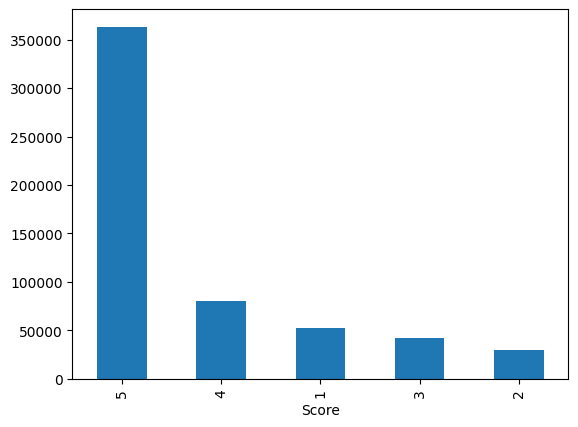

In [7]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score.png");

It looks like we have more reviews with ratings 5, this can lead to unbalanced classes. We will treat rating 4 and 5 as positive and rest as negative reviews.


In [9]:
food_reviews_df.Score[food_reviews_df.Score<=3]=0
food_reviews_df.Score[food_reviews_df.Score>=4]=1

C:\Users\User\AppData\Local\Temp\ipykernel_6728\1090184200.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  food_reviews_df.Score[food_reviews_df.Score<=3]=0
C:\Users\User\AppData\Local\Temp\ipykernel_6728\1090184200.py:1: SettingWithCopy

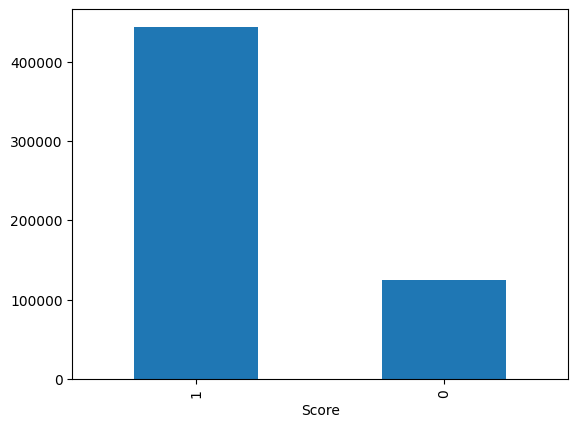

In [10]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score_boolean.png");

In [11]:
food_reviews_df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


Since we have huge data, since it might be difficult to train in kernel, I will reduce data size of 100K rows.
To balance classes, i have selected equal samples from each class.

In [13]:
train_pos_df=food_reviews_df[food_reviews_df.Score==1][:50000]
train_neg_df=food_reviews_df[food_reviews_df.Score==0][:50000]

In [14]:
train_df = pd.concat([train_pos_df, train_neg_df])
train_df.shape

(100000, 2)

In [15]:
val_pos_df = food_reviews_df[food_reviews_df.Score == 1][50000:60000]
val_neg_df = food_reviews_df[food_reviews_df.Score == 0][50000:60000]

val_df = pd.concat([val_pos_df, val_neg_df])
val_df.shape

(20000, 2)

### Linguistic features

#### Tokenization
First step in any nlp pipeline is tokenizing text i.e breaking down paragraphs into sentenses and then sentenses into words, punctuations and so on.

we will load english language model to tokenize our english text.

Every language is different and have different rules. Spacy offers 8 different language models.

In [18]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 145.2 kB/s eta 0:01:28
     --------------------------------------- 0.0/12.8 MB 145.2 kB/s eta 0:01:28
     --------------------------------------- 0.0/12.8 MB 145.2 kB/s eta 0:01:28
     --------------------------------------- 0.0/12.8 MB 115.5 kB/s eta 0:01:51
     --------------------------------------- 0.0/12.8 MB 115.5 kB/s eta 0:01:51
     --------------------------------------- 0.1/12.8 MB 148.8 kB/s eta 0:01:26
     --------------------------------------- 0.1/12.8 MB 148.8 kB/s eta 0:01:26
     --------------------------------------- 0.1/12.8 MB 148.8 kB/s eta 0:01:26


In [19]:
spacy_tok = spacy.load('en_core_web_sm')
sample_review=food_reviews_df.Text[54]
sample_review

"I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively."

In [20]:
parsed_review = spacy_tok(sample_review)
parsed_review

I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively.

There is not much difference between parsed review and original one. But we will see ahead what has actually happened.
We can see how parsing has been done visually through **explacy**.

In [22]:
!curl -O https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6896  100  6896    0     0  10398      0 --:--:-- --:--:-- --:--:-- 10464


In [23]:
import explacy
explacy.print_parse_info(spacy_tok, 'The salad was surprisingly tasty.')

Dep tree Token        Dep type Lemma        Part of Sp
──────── ──────────── ──────── ──────────── ──────────
    ┌─►  The          det      the          DET       
 ┌─►└──  salad        nsubj    salad        NOUN      
┌┼─────  was          ROOT     be           AUX       
││  ┌─►  surprisingly advmod   surprisingly ADV       
│└─►└──  tasty        acomp    tasty        ADJ       
└─────►  .            punct    .            PUNCT     


In [24]:
explacy.print_parse_info(spacy_tok,food_reviews_df.Text[0])

Dep tree                Token       Dep type Lemma      Part of Sp
─────────────────────── ─────────── ──────── ────────── ──────────
                   ┌──► I           nsubj    I          PRON      
                   │┌─► have        aux      have       AUX       
┌┬┬┬───────────────┴┴── bought      ROOT     buy        VERB      
│││└─►┌──────────────── several     dobj     several    ADJ       
│││   └─►┌───────────── of          prep     of         ADP       
│││      │  ┌─────────► the         det      the        DET       
│││      │  │┌────────► Vitality    compound Vitality   PROPN     
│││      │  ││      ┌─► canned      amod     can        VERB      
│││      │  ││   ┌─►└── dog         compound dog        NOUN      
│││      │  ││┌─►└───── food        compound food       NOUN      
│││      └─►└┴┴──────── products    pobj     product    NOUN      
││└───────────────────► and         cc       and        CCONJ     
││                  ┌─► have        aux      have       AUX   

#### Part-of-speech tagging
After tokenization we can parse and tag variety of parts of speech to paragraph text. SpaCy uses statistical models in background to predict which tag will go for each word(s) based on the context.

##### Lemmatization
It is the process of extracting uninflected/base form of the word.
Lemma can be like
For eg. 

Adjectives: best, better → good
Adverbs: worse, worst → badly
Nouns: ducks, children → duck, child
Verbs: standing,stood → stand


In [26]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(parsed_review):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,I,"(I,)",PRON,PRP,nsubj,X,True,True,False
1,roast,"(roast,)",VERB,VBP,ROOT,xxxx,True,False,False
2,at,"(at,)",ADP,IN,prep,xx,True,True,False
3,home,"(home,)",NOUN,NN,pobj,xxxx,True,False,False
4,with,"(with,)",ADP,IN,prep,xxxx,True,True,False
5,a,"(a,)",DET,DT,det,x,True,True,False
6,stove,"(stove,)",NOUN,NN,compound,xxxx,True,False,False
7,-,"(-,)",PUNCT,HYPH,punct,-,False,False,True
8,top,"(top,)",NOUN,NN,compound,xxx,True,True,False
9,popcorn,"(popcorn,)",NOUN,NN,compound,xxxx,True,False,False


#### Named Entity Recognition (NER)
Named entity is real world object like Person, Organization etc

Spacy figures out below entities automatically:

|Type	|Description|
|------|------|
|PERSON|	People, including fictional.
|NORP|	Nationalities or religious or political groups.|
|FAC|	Buildings, airports, highways, bridges, etc.|
|ORG|	Companies, agencies, institutions, etc.|
|GPE|	Countries, cities, states.|
|LOC|	Non-GPE locations, mountain ranges, bodies of water.|
|PRODUCT|	Objects, vehicles, foods, etc. (Not services.)|
|EVENT|	Named hurricanes, battles, wars, sports events, etc.|
|WORK_OF_ART|	Titles of books, songs, etc.|
|LAW|	Named documents made into laws.|
|LANGUAGE|	Any named language.|
|DATE|	Absolute or relative dates or periods.|
|TIME|	Times smaller than a day.|
|PERCENT|	Percentage, including "%".|
|MONEY|	Monetary values, including unit.|
|QUANTITY|	Measurements, as of weight or distance.|
|ORDINAL|	"first", "second", etc.|
|CARDINAL|	Numerals that do not fall under another type|

In [28]:
spacy.displacy.render(parsed_review, style='ent', jupyter=True)


In [29]:
spacy.explain('GPE') # to explain POS tag

'Countries, cities, states'

#### Dependency parsing
Syntactic Parsing or Dependency Parsing is process of identifyig sentenses and assigning a syntactic structure to it.
As in Subject combined with object makes a sentence.
Spacy provides parse tree which can be used to generate this structure.

##### Sentense Boundry Detection
Figuring out where sentense starts and ends is very imporatnt part of nlp.

In [31]:
sentence_spans = list(parsed_review.sents)
sentence_spans

[I roast at home with a stove-top popcorn popper (but I do it outside, of course).,
 These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method.,
 The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time.,
 The aroma is strong and persistent.,
 The taste is smooth, velvety, yet lively.]

In [32]:
displacy.render(parsed_review, style='dep', jupyter=True,options={'distance': 140})

Kindly scroll down if you can't see the output above.
You can even customize dependency parser's output as below.

In [34]:
options = {'compact': True, 'bg': 'violet','distance': 140,
           'color': 'white', 'font': 'Trebuchet MS'}
displacy.render(parsed_review, jupyter=True, style='dep', options=options)

In [35]:
spacy.explain("ADJ") ,spacy.explain("det") ,spacy.explain("ADP") ,spacy.explain("prep")  # to understand tags

('adjective', 'determiner', 'adposition', 'prepositional modifier')

#### Processing Noun chunks

In [37]:
noun_chunks_df = pd.DataFrame()

for i, chunk in enumerate(parsed_review.noun_chunks):
    noun_chunks_df.loc[i, 'text'] = chunk.text
    noun_chunks_df.loc[i, 'root'] = chunk.root,
    noun_chunks_df.loc[i, 'root.text'] = chunk.root.text,
    noun_chunks_df.loc[i, 'root.dep_'] = chunk.root.dep_
    noun_chunks_df.loc[i, 'root.head.text'] = chunk.root.head.text

noun_chunks_df[:20]

,text,root,root.text,root.dep_,root.head.text
0,I,"(I,)","(I,)",nsubj,roast
1,home,"(home,)","(home,)",pobj,at
2,a stove-top popcorn popper,"(popper,)","(popper,)",pobj,with
3,I,"(I,)","(I,)",nsubj,do
4,it,"(it,)","(it,)",dobj,do
5,course,"(course,)","(course,)",pobj,of
6,These beans,"(beans,)","(beans,)",nsubj,seem
7,Coffee Bean Direct Green Mexican Altura,"(Altura,)","(Altura,)",appos,beans
8,this method,"(method,)","(method,)",pobj,for
9,The first and second cracks,"(cracks,)","(cracks,)",nsubj,are


### Visualizing using Scattertext

In [39]:
!pip install scattertext
import scattertext as st
nlp = spacy.load('en',disable_pipes=["tagger","ner"])

TypeError: load() got an unexpected keyword argument 'disable_pipes'

In [61]:
import spacy
import scattertext as st

# Load the spaCy model with 'tagger' and 'ner' pipelines disabled
nlp = spacy.load('en_core_web_sm', disable=["tagger", "ner"])

# Apply the spaCy model to the text data
train_df['parsed'] = train_df.Text[49500:50500].apply(nlp)

# Build the scattertext corpus
corpus = st.CorpusFromParsedDocuments(
    train_df.iloc[49500:50500],
    category_col='Score',
    parsed_col='parsed'
).build()


C:\Users\User\anaconda3\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [63]:
html = st.produce_scattertext_explorer(
    corpus,
    category='1',  # Adjust based on actual categories, e.g., '0' or '1'
    category_name='Positive',  # This is a label, not the category value
    not_category_name='Negative',  # This is a label, not the category value
    width_in_pixels=700,
    minimum_term_frequency=15,
    term_significance=st.LogOddsRatioUninformativeDirichletPrior(),
)


In [65]:
from IPython.display import IFrame

# Open the HTML file and write the content
filename = "positive-vs-negative.html"
open(filename, 'wb').write(html.encode('utf-8'))

# Display the HTML file within the Jupyter notebook
IFrame(src=filename, width=900, height=900)


### Word vectors and similarity

Ok let's do some modelling and focus on scoring our food!!

### Sence2vec

The idea is get something better than word2vec model.

The idea behind sense2vec is super simple. If the problem is that duck as in waterfowl and duck as in crouch are different concepts, the straight-forward solution is to just have two entries, duckN and duckV.  Trask et al (2015) published a nice set of experiments showing that the idea worked well.

It assight parts of speech tags like verb, noun , adjective to words, which will in turn be used to make sence of context.
1. Please book [VERB] my ticket.
2. Read the book [NOUN].

Read more [here](https://explosion.ai/blog/sense2vec-with-spacy) and [here](https://github.com/explosion/sense2vec)

Reddit talks about food a lot so we can get nice similarity vectors for food items.

In [67]:
!pip install sense2vec==1.0.0a0

  Using cached sense2vec-1.0.0a0.tar.gz (311 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [12 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\User\AppData\Local\Temp\pip-install-lq4wg5ix\sense2vec_4b4c7f580a2e45c89bb0f88151ded700\setup.py", line 169, in <module>
      setup_package()
    File "C:\Users\User\AppData\Local\Temp\pip-install-lq4wg5ix\sense2vec_4b4c7f580a2e45c89bb0f88151ded700\setup.py", line 107, in setup_package
      readme = f.read()
               ^^^^^^^^
    File "C:\Users\User\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 13089: character maps to <undefined>
  [end of output]
  
  note: This error origi

In [69]:
pip install --upgrade setuptools wheel


  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.1 which is incompatible.


In [71]:
!pip install sense2vec


In [73]:
# Modify the init_component function in the Sense2VecComponent
def init_component(self):
    """Register the component-specific extension attributes here and only if the component is added to the pipeline."""
    # Use force=True to overwrite the existing extension
    Doc.set_extension("_s2v", default=None, force=True)
    Doc.set_extension("s2v_phrases", getter=self.get_phrases)
    for obj in [Token, Span]:
        obj.set_extension("s2v_freq", getter=self.get_s2v_freq)


In [75]:
from spacy.tokens import Doc

def init_component(self):
    """Register the component-specific extension attributes here and only if the component is added to the pipeline."""
    # Use force=True to overwrite the existing extension
    Doc.set_extension("_s2v", default=None, force=True)
    Doc.set_extension("s2v_phrases", getter=self.get_phrases)
    for obj in [Token, Span]:
        obj.set_extension("s2v_freq", getter=self.get_s2v_freq)


Similarity between entities can be kind of fun.


The following attributes are available via the ._ property – for example token._.in_s2v:

Name	|Attribute Type|	Type|	Description|
--------|---------------|-------------|---------------|
in_s2v	|property|	bool|	Whether a key exists in the vector map.
s2v_freq|	property|	int|	The frequency of the given key.
s2v_vec|	property|	ndarray[float32]|	The vector of the given key.
s2v_most_similar|	method|	list|	Get the n most similar terms. Returns a list of ((word, sense), score) tuples.



## SpaCy Text Categorizer

We will train a multi-label convolutional neural network text classifier on our food reviews, using spaCy's new TextCategorizer  component.

SpaCy provides classification model with multiple, non-mutually exclusive labels. You can change the model architecture rather easily, but by default, the TextCategorizer class uses a convolutional neural network to assign position-sensitive vectors to each word in the document. The TextCategorizer uses its own CNN model, to avoid sharing weights with the other pipeline components. The document tensor is then summarized by concatenating max and mean pooling, and a multilayer perceptron is used to predict an output vector of length nr_class, before a logistic activation is applied elementwise. The value of each output neuron is the probability that some class is present.

#### Prepare data
Let's prepare the data as SpaCy would like it.
It accepts list of tuples of text and labels.

In [77]:
train_df['tuples'] = train_df.apply(
    lambda row: (row['Text'],row['Score']), axis=1)
train = train_df['tuples'].tolist()
train[:1]

[('I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
  1)]

In [79]:
train[-2:]

[("I ordered this product specifically to try out the three different types of products. However, when I received the product, I opened it up only to find three of the Barn Burner salsas - obviously not what I had ordered.<br /><br />Buy at your own risk - who knows what you'll end up getting.",
  0),
 ('Terrific - easy to use and great taste.  Only complaint is that the price is MUCH too high.',
  0)]

In [81]:
#functions from spacy documentation
def load_data(limit=0, split=0.8):
    train_data = train
    np.random.shuffle(train_data)
    train_data = train_data[-limit:]
    texts, labels = zip(*train_data)
    cats = [{'POSITIVE': bool(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])

def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 1e-8  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 1e-8  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall) / (precision + recall)
    return {'textcat_p': precision, 'textcat_r': recall, 'textcat_f': f_score}

#("Number of texts to train from","t" , int)
n_texts=30000
#You can increase texts count if you have more computational power.

#("Number of training iterations", "n", int))
n_iter=10

In [83]:
nlp = spacy.load('en_core_web_sm')  # create english Language class

In [85]:
# add the text classifier to the pipeline if it doesn't exist
# nlp.create_pipe works for built-ins that are registered with spaCy
if 'textcat' not in nlp.pipe_names:
    nlp.add_pipe('textcat', last=True)
textcat = nlp.get_pipe('textcat')

# add label to text classifier
textcat.add_label('POSITIVE')

# load the dataset
print("Loading food reviews data...")
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)
print("Using {} examples ({} training, {} evaluation)"
      .format(n_texts, len(train_texts), len(dev_texts)))
train_data = list(zip(train_texts,
                      [{'cats': cats} for cats in train_cats]))

Loading food reviews data...
Using 30000 examples (24000 training, 6000 evaluation)


### Training model

In [87]:
!python -m spacy download en_core_web_md


     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     --------------------------------------- 0.0/33.5 MB 435.7 kB/s eta 0:01:17
     --------------------------------------- 0.0/33.5 MB 435.7 kB/s eta 0:01:17
     --------------------------------------- 0.1/33.5 MB 328.2 kB/s eta 0:01:42
     --------------------------------------- 0.1/33.5 MB 328.2 kB/s eta 0:01:42
     --------------------------------------- 0.1/33.5 MB 328.2 kB/s eta 0:01:42
     --------------------------------------- 0.1/33.5 MB 327.7 kB/s eta 0:01:42
     --------------------------------------- 0.1/33.5 MB 343.4 kB/s eta 0:01:38
     --------------------------------------- 0.1/33.5 MB 370.8 kB/s eta 0:01:30
     --------------------------------------- 0.2/33.5 MB 403.5 kB/s eta 0:01:23
     --------------------------------------- 0.2/33.5 MB 415.7 kB/s eta 0:01:21
     --------------------------------------- 0.2/33.5 MB

In [89]:
import spacy

nlp = spacy.load("en_core_web_md")


In [91]:
import spacy
from spacy.lookups import Lookups

# Load the spaCy model
nlp = spacy.load("en_core_web_md")

# Check if the table already exists
if "lexeme_norm" not in nlp.vocab.lookups:
    # Create a custom lookup table for lexeme normalization
    lookups = Lookups()
    lexeme_norm_data = {
        "U.S.": "United States",
        "N.Y.": "New York",
        # Add more custom entries as needed
    }
    lookups.add_table("lexeme_norm", lexeme_norm_data)

    # Add the lookup table to the NLP pipeline
    nlp.vocab.lookups.add_table("lexeme_norm", lookups.get_table("lexeme_norm"))

# Test the lookup table
doc = nlp("I live in the U.S.")
norm_text = " ".join([nlp.vocab.lookups.get_table("lexeme_norm").get(w.text, w.text) for w in doc])
print(norm_text)  # Output: I live in the United States


I live in the U.S.


In [93]:
!pip install spacy-lookups-data


In [95]:
!python -m spacy download en_core_web_md


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.8.0/en_core_web_md-3.8.0-py3-none-any.whl (33.5 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [121]:
import spacy
from spacy.util import minibatch, compounding
from spacy.training import Example

# Load the pre-trained model and add the text categorizer component if not already present
nlp = spacy.load("en_core_web_md")
if "textcat" not in nlp.pipe_names:
    textcat = nlp.add_pipe("textcat", last=True)
else:
    textcat = nlp.get_pipe("textcat")

# Add labels to the text categorizer
textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")

# Example training data
train_data = [
    ("I love this product. It's amazing!", {"cats": {"POSITIVE": 1, "NEGATIVE": 0}}),
    ("This is the worst thing I ever bought.", {"cats": {"POSITIVE": 0, "NEGATIVE": 1}}),
    # Add more examples here...
]

# Define the evaluation function
def evaluate(tokenizer, model, texts, labels):
    correct = 0
    total = 0
    for text, label in zip(texts, labels):
        doc = tokenizer(text)
        prediction = model.predict([doc])
        predicted_label_idx = prediction.argmax(axis=1)[0]
        predicted_label = model.labels[predicted_label_idx]
        true_label = max(label, key=label.get)
        correct += (predicted_label == true_label)
        total += 1
    precision = correct / total if total > 0 else 0
    recall = correct / total if total > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return {"textcat_p": precision, "textcat_r": recall, "textcat_f": f1_score}

# Training the model
n_iter = 10
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()
    print("Training the model...")
    print('{:^5}\t{:^5}\t{:^5}\t{:^5}'.format('LOSS', 'P', 'R', 'F'))
    for i in range(n_iter):
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(train_data, size=compounding(4., 32., 1.001))
        for batch in batches:
            for text, annotations in batch:
                doc = nlp.make_doc(text)
                example = Example.from_dict(doc, annotations)
                nlp.update([example], sgd=optimizer, drop=0.2, losses=losses)
        # Evaluation
        dev_texts = [text for text, _ in train_data]
        dev_cats = [annotations["cats"] for _, annotations in train_data]
        with textcat.model.use_params(optimizer.averages):
            scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print('{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}'.format(
            losses['textcat'], scores['textcat_p'], scores['textcat_r'], scores['textcat_f']
        ))

# Test the trained model
test_text1 = 'This tea is fun to watch as the flower expands in the water. Very smooth taste and can be used again and again in the same day. If you love tea, you gotta try these "flowering teas"'
test_text2 = "I bought this product at a local store, not from this seller. I usually use Wellness canned food, but thought my cat was bored and wanted something new. So I picked this up, knowing that Evo is a really good brand (like Wellness).<br /><br />It is one of the most disgusting smelling cat foods I've ever had the displeasure of using. I was gagging while trying to put it into the bowl. My cat took one taste and walked away, and chose to eat nothing until I replaced it 12 hours later with some dry food. I would try another flavor of their food - since I know it's high quality - but I wouldn't buy the duck flavor again."

doc1 = nlp(test_text1)
doc2 = nlp(test_text2)

print(test_text1, doc1.cats)
print(test_text2, doc2.cats)


Training the model...
LOSS 	  P  	  R  	  F  
0.508	1.000	1.000	1.000
0.481	1.000	1.000	1.000
0.446	1.000	1.000	1.000
0.443	1.000	1.000	1.000
0.380	1.000	1.000	1.000
0.334	1.000	1.000	1.000
0.338	1.000	1.000	1.000
0.205	1.000	1.000	1.000
0.118	1.000	1.000	1.000
0.107	1.000	1.000	1.000
This tea is fun to watch as the flower expands in the water. Very smooth taste and can be used again and again in the same day. If you love tea, you gotta try these "flowering teas" {'POSITIVE': 0.36350882053375244, 'NEGATIVE': 0.6364912390708923}
I bought this product at a local store, not from this seller. I usually use Wellness canned food, but thought my cat was bored and wanted something new. So I picked this up, knowing that Evo is a really good brand (like Wellness).<br /><br />It is one of the most disgusting smelling cat foods I've ever had the displeasure of using. I was gagging while trying to put it into the bowl. My cat took one taste and walked away, and chose to eat nothing until I replaced

In [123]:
# test the trained model
test_text1 = 'This tea is fun to watch as the flower expands in the water. Very smooth taste and can be used again and again in the same day. If you love tea, you gotta try these "flowering teas"'
test_text2="I bought this product at a local store, not from this seller.  I usually use Wellness canned food, but thought my cat was bored and wanted something new.  So I picked this up, knowing that Evo is a really good brand (like Wellness).<br /><br />It is one of the most disgusting smelling cat foods I've ever had the displeasure of using.  I was gagging while trying to put it into the bowl.  My cat took one taste and walked away, and chose to eat nothing until I replaced it 12 hours later with some dry food.  I would try another flavor of their food - since I know it's high quality - but I wouldn't buy the duck flavor again."
doc = nlp(test_text1)
test_text1, doc.cats

('This tea is fun to watch as the flower expands in the water. Very smooth taste and can be used again and again in the same day. If you love tea, you gotta try these "flowering teas"',
 {'POSITIVE': 0.36350882053375244, 'NEGATIVE': 0.6364912390708923})

In [125]:
# Test the trained model
test_text1 = 'This tea is fun to watch as the flower expands in the water. Very smooth taste and can be used again and again in the same day. If you love tea, you gotta try these "flowering teas"'

# Process the text through the NLP pipeline
doc1 = nlp(test_text1)

# Print the result in the desired format
print((test_text1, doc1.cats))


('This tea is fun to watch as the flower expands in the water. Very smooth taste and can be used again and again in the same day. If you love tea, you gotta try these "flowering teas"', {'POSITIVE': 0.36350882053375244, 'NEGATIVE': 0.6364912390708923})


Positive review is indeed close to 1

In [104]:
doc2 = nlp(test_text2)
test_text2, doc2.cats

("I bought this product at a local store, not from this seller.  I usually use Wellness canned food, but thought my cat was bored and wanted something new.  So I picked this up, knowing that Evo is a really good brand (like Wellness).<br /><br />It is one of the most disgusting smelling cat foods I've ever had the displeasure of using.  I was gagging while trying to put it into the bowl.  My cat took one taste and walked away, and chose to eat nothing until I replaced it 12 hours later with some dry food.  I would try another flavor of their food - since I know it's high quality - but I wouldn't buy the duck flavor again.",
 {'positive': 0.5452423691749573, 'negative': 0.4547576308250427})

Negative review is close to 0

In [107]:
output_dir=%pwd
nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to C:\Users\User


In [ ]:
# test the saved model
print("Loading from", output_dir)
nlp2 = spacy.load(output_dir)
doc2 = nlp2(test_text2)
print(test_text2, doc2.cats)